# Bevölkerung US

In [3]:
import pandas as pd
import plotly.express as px

# Daten einlesen
df = pd.read_csv('population.csv')

# Nur Bundesstaaten filtern (SUMLEV = 40) und Puerto Rico ausschließen (STATE != 72)
# Zusätzlich filtern wir Zeilen aus, wo REGION 'X' ist
df_states = df[(df['SUMLEV'] == 40) & (df['STATE'] != '72') & (df['REGION'] != 'X')].copy()

# Prozentuale Veränderung 2010-2019 berechnen
df_states['change_2010_2019'] = ((df_states['POPESTIMATE2019'] - df_states['POPESTIMATE2010']) / 
                                df_states['POPESTIMATE2010'] * 100)

# Region-Namen zuordnen
region_map = {
    '1': 'Northeast',
    '2': 'Midwest',
    '3': 'South',
    '4': 'West'
}

# Region Namen hinzufügen (jetzt ohne astype(int))
df_states['REGION_NAME'] = df_states['REGION'].map(region_map)

# Nach Veränderung sortieren
df_states = df_states.sort_values('change_2010_2019', ascending=True)

# Grafik erstellen
fig = px.bar(
    df_states,
    x='change_2010_2019',
    y='NAME',
    color='REGION_NAME',
    orientation='h',
    title='Bevölkerungswachstum nach State',
    labels={
        'change_2010_2019': 'Prozentuale Veränderung',
        'NAME': 'State',
        'REGION_NAME': 'Region'
    },
    color_discrete_map={
        'Northeast': '#ffeb00',  # Gelb
        'Midwest': '#228B22',    # Grün
        'South': '#4169E1',      # Blau
        'West': '#FFA500'        # Orange
    }
)

# Layout anpassen
fig.update_layout(
    title={
        'text': 'Bevölkerungswachstum nach State<br>Bevölkerungswachstum 2010-2019',
        'y': 0.95,
        'x': 0,
        'xanchor': 'left',
        'yanchor': 'top'
    },
    xaxis_title='Prozentuale Veränderung',
    yaxis_title='',
    plot_bgcolor='white',
    height=900,
    margin=dict(l=140, r=20, t=100, b=40),
    showlegend=True,
    legend=dict(
        title='Region',
        orientation='v',
        yanchor='top',
        y=1,
        xanchor='right',
        x=1
    )
)

# Achsen anpassen
fig.update_xaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='lightgray',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='black'
)

fig.update_yaxes(
    showgrid=False,
    showline=False,
    showticklabels=True
)

# Grafik anzeigen
fig.show()

---

In [1]:
import pandas as pd

df_temp = pd.read_csv('/Users/tobiasmaissen/Desktop/CAS_DaVi/plotly/ugz_ogd_meteo_h1_2021.csv')

In [4]:
df_temp

,Datum,Standort,Parameter,Intervall,Einheit,Wert,Status
0,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,T,h1,°C,2.35,bereinigt
1,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,Hr,h1,%Hr,87.68,bereinigt
2,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,p,h1,hPa,953.89,bereinigt
3,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,RainDur,h1,min,0.00,bereinigt
4,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,StrGlo,h1,W/m2,0.02,bereinigt
...,...,...,...,...,...,...,...
192715,2021-12-31T23:00+0100,Zch_Rosengartenstrasse,p,h1,hPa,977.55,bereinigt
192716,2021-12-31T23:00+0100,Zch_Rosengartenstrasse,RainDur,h1,min,0.00,bereinigt
192717,2021-12-31T23:00+0100,Zch_Rosengartenstrasse,WD,h1,°,NaN,bereinigt
192718,2021-12-31T23:00+0100,Zch_Rosengartenstrasse,WVv,h1,m/s,NaN,bereinigt


In [6]:
df_filtered = df_temp.loc[(df_temp['Standort'] == 'Zch_Stampfenbachstrasse') & (df_temp['Parameter'] == 'T')]

In [7]:
df_filtered

,Datum,Standort,Parameter,Intervall,Einheit,Wert,Status
0,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,T,h1,°C,2.35,bereinigt
22,2021-01-01T01:00+0100,Zch_Stampfenbachstrasse,T,h1,°C,2.10,bereinigt
44,2021-01-01T02:00+0100,Zch_Stampfenbachstrasse,T,h1,°C,2.29,bereinigt
66,2021-01-01T03:00+0100,Zch_Stampfenbachstrasse,T,h1,°C,2.04,bereinigt
88,2021-01-01T04:00+0100,Zch_Stampfenbachstrasse,T,h1,°C,2.33,bereinigt
...,...,...,...,...,...,...,...
192610,2021-12-31T19:00+0100,Zch_Stampfenbachstrasse,T,h1,°C,9.50,bereinigt
192632,2021-12-31T20:00+0100,Zch_Stampfenbachstrasse,T,h1,°C,9.12,bereinigt
192654,2021-12-31T21:00+0100,Zch_Stampfenbachstrasse,T,h1,°C,8.47,bereinigt
192676,2021-12-31T22:00+0100,Zch_Stampfenbachstrasse,T,h1,°C,7.94,bereinigt


/var/folders/9q/8bszxhp53q74k1yrkmxsmf3r0000gn/T/ipykernel_24122/2905394126.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Datum'] = pd.to_datetime(df_filtered['Datum'])
/var/folders/9q/8bszxhp53q74k1yrkmxsmf3r0000gn/T/ipykernel_24122/2905394126.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Monat'] = df_filtered['Datum'].dt.month


<Figure size 1200x800 with 0 Axes>

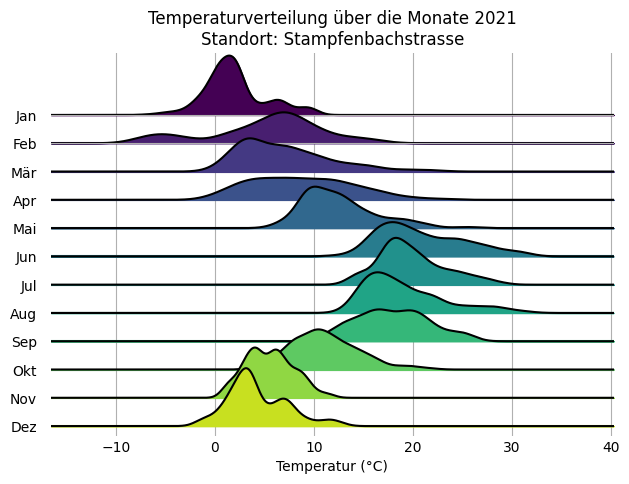

In [9]:
import pandas as pd
import joypy
import matplotlib.pyplot as plt

# Datum in datetime umwandeln
df_filtered['Datum'] = pd.to_datetime(df_filtered['Datum'])

# Monat extrahieren
df_filtered['Monat'] = df_filtered['Datum'].dt.month

# Ridgeline Plot erstellen
plt.figure(figsize=(12, 8))
joypy.joyplot(
    data=df_filtered,
    by="Monat",
    column="Wert",
    colormap=plt.cm.viridis,
    title="Temperaturverteilung über die Monate 2021\nStandort: Stampfenbachstrasse",
    labels=['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez'],
    range_style='all',
    tails=0.2,
    overlap=0.7,
    grid=True
)
plt.xlabel("Temperatur (°C)")
plt.show()

In [11]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Datum in datetime umwandeln
df_filtered['Datum'] = pd.to_datetime(df_filtered['Datum'])

# Monat extrahieren
df_filtered['Monat'] = df_filtered['Datum'].dt.month

# Monatsnamen für die Labels
month_names = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']

# Figure erstellen
fig = go.Figure()

# Für jeden Monat einen Violin Plot erstellen
for month in range(1, 13):
    month_data = df_filtered[df_filtered['Monat'] == month]['Wert']
    
    fig.add_trace(go.Violin(
        y=[month] * len(month_data),  # Position auf der y-Achse
        x=month_data,                 # Temperaturwerte
        name=month_names[month-1],    # Monatsnamen als Label
        side='negative',              # Nach oben zeigend
        orientation='h',              # Horizontale Ausrichtung
        width=2,                      # Breite der Violinen
        points=False,                 # Keine einzelnen Punkte zeigen
        line_color='rgba(0,0,0,0.2)', # Linienfarbe
        fillcolor=f'hsl({(month-1)*30},70%,50%)'  # Verschiedene Farben für jeden Monat
    ))

# Layout anpassen
fig.update_layout(
    title='Temperaturverteilung über die Monate 2021<br>Standort: Stampfenbachstrasse',
    xaxis_title='Temperatur (°C)',
    yaxis_title='Monat',
    yaxis=dict(
        ticktext=month_names,
        tickvals=list(range(1, 13)),
        autorange="reversed"  # Januar oben, Dezember unten
    ),
    showlegend=False,
    height=800,
    plot_bgcolor='white'
)

# Gitterlinien hinzufügen
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

# Plot anzeigen
fig.show()

/var/folders/9q/8bszxhp53q74k1yrkmxsmf3r0000gn/T/ipykernel_24122/2840916609.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9q/8bszxhp53q74k1yrkmxsmf3r0000gn/T/ipykernel_24122/2840916609.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

